#**Асия Казанбаосова**
##**Промежуточная аттестация (PYTHON)**

###**Описание:** В данном проекте представлены краткая аналитика и визуализация данных по авто на языке PYTHON с использованием библиотек Pandas, Matloblib и Seaborn.

In [1]:
import pandas as pd

**Считаем данные по Справочнику**

In [6]:
directory = pd.read_excel('/content/Справочник.xlsx')

In [7]:
directory.head()

,Марка,Модель,Цена,Валюта,Маржинальность,Курсы,Цена (руб.),Маржа (руб.),Маржа
0,Mercedes,gls,1.135135e+05,Доллар США,0.33,91.6879,1.040782e+07,3.434579e+06,2.582390e+06
1,Mercedes,GT_AMG,1.743243e+05,Доллар США,0.34,91.6879,1.598343e+07,5.434367e+06,4.055497e+06
2,BMW,x5,7.222222e+04,Евро,0.27,99.8189,7.209143e+06,1.946469e+06,1.532652e+06
3,BMW,i3,5.166667e+04,Евро,0.35,99.8189,5.157310e+06,1.805058e+06,1.337080e+06
4,Mercedes,с180,2.300000e+06,Рубль,0.20,1.0000,2.300000e+06,4.600000e+05,3.833333e+05


**Считаем данные по Данным из CRM**

In [8]:
crm = pd.read_excel('/content/CRM.xlsx')

In [9]:
crm.head()

,Client ID,Город,Просчет стоимости модели,Приход к диллеру,Продажа
0,GA1.2.1108606219.1572272784,Krasnodar,NaN,0,NaN
1,GA1.2.125017234.1571028033,Krasnodar,0.0,1,NaN
2,GA1.2.1823974094.1570697747,Krasnodar,0.0,0,0.0
3,GA1.2.1823974094.1570697747,Krasnodar,0.0,1,NaN
4,GA1.2.554197778.1572516039,Krasnodar,NaN,0,NaN


**Считаем данные по Маркетинговым данным**

In [10]:
market_data = pd.read_excel('/content/МаркетДанные.xlsx')

In [11]:
market_data.head()

,Client ID,Domain,City,Region,Browser,Device Category,Date,Pageviews,Campaign,Keyword,...,Avg. Session Duration,Bounce Rate,Sessions,Goal Completion Location,Goal Completions,Goal Conversion Rate,Goal Value,Конверсия,Source conv.,Марка
0,GA1.2.1029165320.1581675414,BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,14 февраля 2020 г.,18,(not set),(not set),...,0.002292,0,1,/offers/buy/?trade_source=footer,1,1.0,38039,1,cars.BMW-keyauto-krd.ru,BMW
1,GA1.2.1029165320.1581675414,cars.BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,14 февраля 2020 г.,6,(not set),(not set),...,0.000926,0,2,/,1,0.5,17971,1,BMW-keyauto-krd.ru,BMW
2,GA1.2.1029165320.1581675414,BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,14 февраля 2020 г.,18,(not set),(not set),...,0.002292,0,1,/,1,1.0,21442,1,cars.BMW-keyauto-krd.ru,BMW
3,GA1.2.360702973.1573932024,BMW-keyauto-krd.ru,Zurich,Zurich,YaBrowser,mobile,28 января 2020 г.,2,(not set),(not set),...,0,0,1,/models/NewElantra/,0,0.0,0,0,yandex.ru,BMW
4,GA1.2.1394084210.1579796276,Mersedes-krasnodar.ru,Zurich,Zurich,Chrome,mobile,27 января 2020 г.,2,(not set),(not provided),...,0.000567,0,2,/models/cla/options/,1,0.5,8498,1,google,Mersedes


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

###***1. Рассмотрим с каких устройств чаще заходят на сайты***

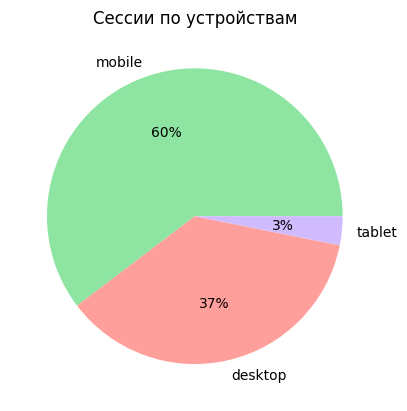

In [17]:
devices = market_data.groupby('Device Category')['Sessions'].sum().sort_values(ascending = False)
color = sns.color_palette('pastel')[2:5]
plt.title('Сессии по устройствам')
plt.pie(devices, labels=devices.index, colors=color, autopct='%.0f%%');

###**Вывод:** как видим использование мобильных телефонов составляет наибольшую долю среди представленных устройств (60%).

###***2. Проанализируем источники по конвертируемости***

In [18]:
conversion_by_source = market_data.groupby("Source")["Конверсия"].sum().sort_values(ascending=False)
conversion_by_source.head()

Source
google                9106
yandex.ru             5668
yandex                5035
(direct)              4790
BMW-keyauto-krd.ru    4151
Name: Конверсия, dtype: int64

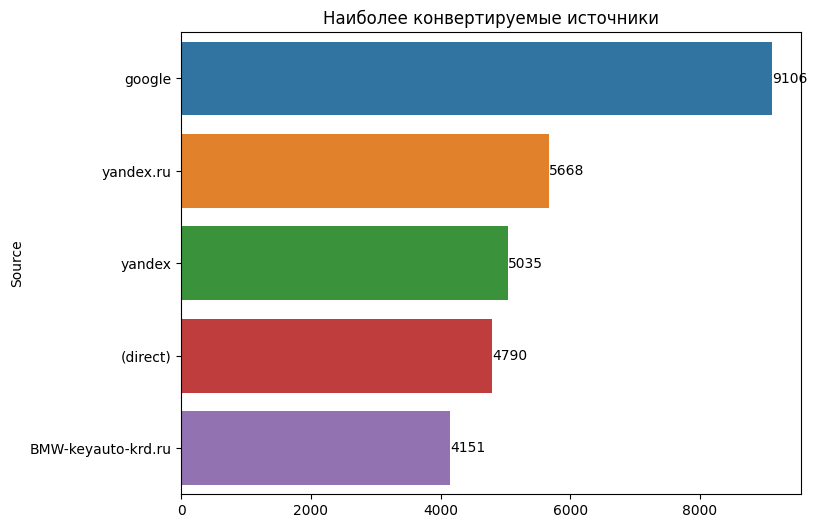

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x=conversion_by_source.values[:5], y=conversion_by_source.index[:5])

for i, v in enumerate(conversion_by_source.values[:5]):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

plt.title('Наиболее конвертируемые источники');

###**Вывод:** то есть наибольшее предпочтение отдается google и yandex.ru

###***3. По такому же принципу как в предыдущем примере, рассмотрим из каких регионов больше всего заявок***

In [20]:
conversion_by_region = market_data.groupby("Region")["Конверсия"].sum().sort_values(ascending=False)
conversion_by_region.head()

Region
Krasnodar Krai    23849
Stavropol Krai     1642
Rostov Oblast      1160
Moscow             1036
Crimea              667
Name: Конверсия, dtype: int64

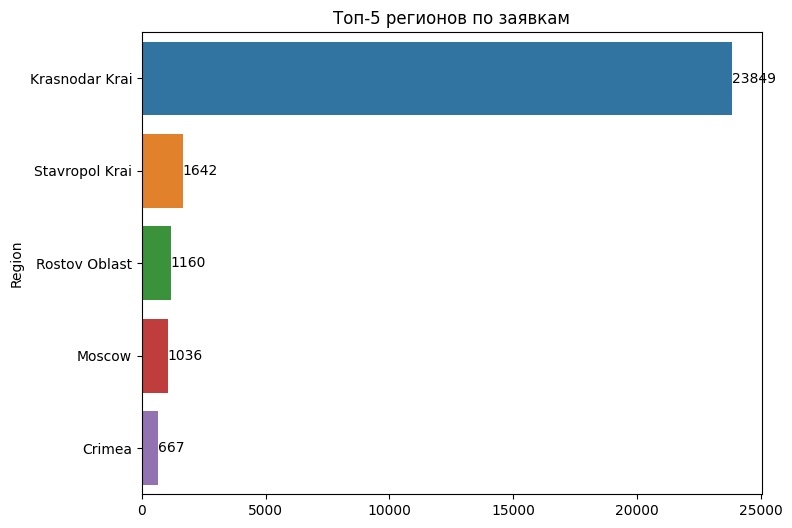

In [21]:
plt.figure(figsize=(8, 6))

sns.barplot(x=conversion_by_region.values[:5], y=conversion_by_region.index[:5])

for i, v in enumerate(conversion_by_region.values[:5]):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

plt.title('Топ-5 регионов по заявкам');

###**Вывод:** лидером по заявкам выступает Краснодарский Край